# Importing libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing data


In [3]:
df = pd.read_csv("MPG.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
 #To Identify categorical variables
df.nunique()    

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Removing missing values

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data visualization

In [9]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
name            301
dtype: int64

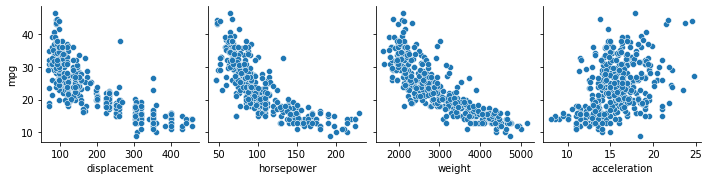

In [10]:
sns.pairplot(df, y_vars = 'mpg',x_vars = ['displacement','horsepower','weight','acceleration'])

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

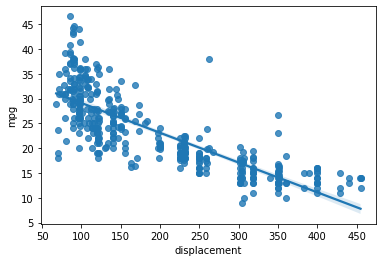

In [11]:
sns.regplot(data = df, y='mpg',x='displacement')

 # Defining dependent and independent variables

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [13]:
y = df['mpg']

In [14]:
y.shape

(392,)

In [15]:
X = df[['displacement','horsepower','weight','acceleration']]

In [16]:
X.shape

(392, 4)

# Scaling Data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()

In [19]:
X = ss.fit_transform(X)

In [20]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [21]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# Defining train , test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model

In [25]:
from  sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
lr.intercept_
#gives mileage

23.537388375981575

In [29]:
lr.coef_
#gives displacement,horsepower,weight,acceration repectively

array([-0.14483956, -1.90625118, -4.60537531,  0.15424142])

# Predict Test Data

In [30]:
y_pred = lr.predict(X_test)

In [31]:
y_pred

array([27.40803733, 31.33180225, 28.57465808, 11.02215042, 23.90949228,
       22.90905705,  8.85141425, 25.34372524, 29.99256464, 22.01941462,
       25.8908931 , 27.29048292, 28.96785423, 20.18160496, 16.22038205,
       30.11294518, 24.07853244, 28.20191323, 30.84135807, 28.11975684,
       32.45590099, 31.92453174, 29.30698858,  6.23185486, 15.75249657,
        7.81739299, 11.50926878, 30.97116361, 24.72069777, 27.37709077,
       30.95421946, 24.43226781,  9.94536549, 23.84710151, 17.99440592,
       22.13494074, 28.47517586, 17.82771934, 10.39448737, 21.20394031,
       28.9075105 , 31.5518878 , 22.18870453, 13.58864789, 30.83929678,
       31.00556845, 29.85134318, 13.28645562, 24.65059675, 24.66706186,
       29.71365084, 29.99877071, 14.09226754, 29.16115927, 25.00340424,
       31.0743821 , 27.18424674, 23.34243722, 17.42830337, 23.38021425,
       21.00293829, 14.71066873, 31.40219711, 26.59718487, 26.37049072,
       16.4034918 , 21.8736053 , 18.81429812, 24.42713277, 15.22

# checking accuracy

In [32]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error ,r2_score

In [33]:
mean_absolute_error(y_test,y_pred)

3.0763141614480007

In [34]:
mean_absolute_percentage_error(y_test,y_pred)

0.14369128202448245

In [35]:
r2_score(y_test,y_pred)

0.7349760032381798

# Polynomial Regression


In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
 poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [38]:
X_train2 = poly.fit_transform(X_train)

In [39]:
X_test2 = poly.fit_transform(X_test)

In [40]:
lr.fit(X_train2, y_train)

LinearRegression()

In [43]:
lr.intercept_

21.34904236675661

# Prediction

In [44]:
y_pred2 = lr.predict(X_test2)

# Checking accuracy

In [45]:
mean_absolute_error(y_test,y_pred2)

2.875097198664974

In [46]:
mean_absolute_percentage_error(y_test,y_pred2)

0.12926504740080846

In [47]:
r2_score(y_test,y_pred2)

0.7743833465041307